In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

In [2]:
x_df = pd.read_csv('../data/processed/processed_x_dataset.csv')
reddit_df = pd.read_csv('../data/processed/processed_reddit_dataset.csv')

In [3]:
x_df['source'] = "x"

In [4]:
del reddit_df['Unnamed: 0']

reddit_df['source'] = "reddit"

In [5]:
reddit_df.columns

Index(['processed_text', 'label', 'source'], dtype='object')

In [6]:
print(f"Length of the x dataset: {len(x_df)}, length of the reddit dataset: {len(reddit_df)}")
df = pd.concat([x_df, reddit_df])
print(len(df))
df = df.iloc[:, [0, 2, 1]]


Length of the x dataset: 1722, length of the reddit dataset: 44517
46239


In [7]:
df['processed_text'].duplicated().sum()

27206

In [8]:
df.drop_duplicates(subset=['processed_text'], inplace=True)

In [9]:
len(df)

19033

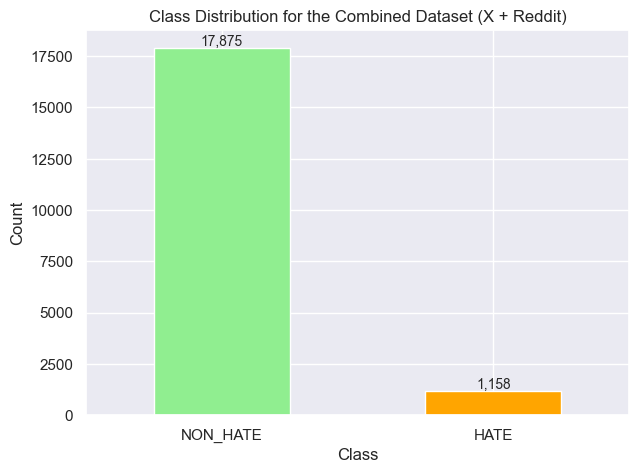

In [11]:
class_count = df['label'].value_counts()
plt.figure(figsize=(7,5))
bars = class_count.plot(kind='bar', color=['lightgreen','orange'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
    
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for the Combined Dataset (X + Reddit)")
plt.xticks(rotation=0)
plt.show()

kaggle dataset taken from https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset
currently not a part of this repo since it has 138.40 MB which exceeds GitHub's file size limit of 100.00 MB

In [12]:
k_df = pd.read_csv('../data/processed/processed_kaggle_dataset.csv')
k_df['source'] = 'kaggle'
k_df['label'] = k_df['label'].map({1:"HATE", 0:"NON_HATE"})
k_df['label'].value_counts()

label
HATE        358561
NON_HATE    341506
Name: count, dtype: int64

In [13]:
hate_speech = k_df[k_df['label'] == 'HATE']
not_hate = k_df[k_df['label'] == 'NON_HATE']

hate_sample = hate_speech.sample(n=20000, random_state=42)
non_hate_sample = not_hate.sample(n=2000, random_state=42)


_k_df = pd.concat([hate_sample, non_hate_sample])
_k_df['label'].value_counts()

label
HATE        20000
NON_HATE     2000
Name: count, dtype: int64

In [14]:
df = pd.concat([df, _k_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df['label'].value_counts()
df


,processed_text,source,label
0,not differentiate easily love white man especi...,kaggle,HATE
1,hey slut busy little last resort love yer son ...,kaggle,HATE
2,stop noticing thing,reddit,NON_HATE
3,people include feel today son bitch trump birt...,kaggle,HATE
4,not state not apply incognito mode say use sec...,kaggle,HATE
...,...,...,...
41028,end goal gain control state legislature call c...,reddit,NON_HATE
41029,well apparently trans woman vagina,reddit,HATE
41030,jew non animate,kaggle,HATE
41031,thou wilt walk david thy father walk integrity...,x,NON_HATE


In [15]:
df['label'] = df['label'].map({"HATE":1, "NON_HATE":0})
df

,processed_text,source,label
0,not differentiate easily love white man especi...,kaggle,1
1,hey slut busy little last resort love yer son ...,kaggle,1
2,stop noticing thing,reddit,0
3,people include feel today son bitch trump birt...,kaggle,1
4,not state not apply incognito mode say use sec...,kaggle,1
...,...,...,...
41028,end goal gain control state legislature call c...,reddit,0
41029,well apparently trans woman vagina,reddit,1
41030,jew non animate,kaggle,1
41031,thou wilt walk david thy father walk integrity...,x,0


In [16]:
df.to_csv('../data/final/final_df.csv', index=False)